In [40]:
import katdal
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import pickle

In [41]:
filename='/var/kat/archive3/data/MeerKATAR1/telescope_products/2017/12/02/1512178226.h5'

In [42]:
h = katdal.open(filename)

In [43]:
print h

Name: /var/kat/archive3/data/MeerKATAR1/telescope_products/2017/12/02/1512178226.h5 (version 3.0)
Observer: Lindsay  Experiment ID: 20171201-0044
Description: 'MKAIV-584 Generic AR1 delaycal'
Observed from 2017-12-02 03:30:29.642 SAST to 2017-12-02 03:34:19.545 SAST
Dump rate / period: 0.50021 Hz / 1.999 s
Subarrays: 1
  ID  Antennas                            Inputs  Corrprods
   0  m006,m015,m024,m036,m041,m042,m043,m044,m048,m050,m051,m052,m054,m055,m061,m062  32      544
Spectral Windows: 1
  ID Band Product  CentreFreq(MHz)  Bandwidth(MHz)  Channels  ChannelWidth(kHz)
   0 L    bc856M4k   1284.000         856.000           4096       208.984
-------------------------------------------------------------------------------
Data selected according to the following criteria:
  subarray=0
  ants=['m054', 'm055', 'm015', 'm044', 'm043', 'm042', 'm041', 'm052', 'm061', 'm006', 'm062', 'm036', 'm024', 'm050', 'm048', 'm051']
  spw=0
---------------------------------------------------------

In [44]:
# check what cal products we have
print 'Solutions:'
print '    Product             Number of solutions'
for k in h.file['TelescopeState'].keys():
    if 'cal_product' in k:
        print '   ', k, ' --- ' , len(h.file['TelescopeState'][k])

Solutions:
    Product             Number of solutions
    cal_product_B  ---  1
    cal_product_K  ---  1
    cal_product_G  ---  1


In [45]:
np.set_printoptions(precision=4,suppress=True)

In [46]:
# check antenna ordering
print h.file['TelescopeState']['cal_antlist']
a_list=[]
aa=h.file['TelescopeState']['cal_antlist']
for i,ai in enumerate(aa):
    a_list.append(pickle.loads(ai[1]))
a_array=np.array(a_list)
print a_list
print a_array[0]
labels=a_array[0]

<HDF5 dataset "cal_antlist": shape (1,), type "|V214">
[['m006', 'm015', 'm024', 'm036', 'm041', 'm042', 'm043', 'm044', 'm048', 'm050', 'm051', 'm052', 'm054', 'm055', 'm061', 'm062']]
['m006' 'm015' 'm024' 'm036' 'm041' 'm042' 'm043' 'm044' 'm048' 'm050'
 'm051' 'm052' 'm054' 'm055' 'm061' 'm062']


# Delays

In [47]:
k = h.file['TelescopeState']['cal_product_K']
k_list = []
for i, ki in enumerate(k):
    k_list.append(pickle.loads(ki[1]))
k_array = np.array(k_list)

k_0 = k_array[:,0,:]*1e9
k_1 = k_array[:,1,:]*1e9

In [48]:
k_array.shape #Times,Pols,Antennas

(1, 2, 16)

In [49]:
# print delays (if there are few delays)
print 'POL 0: ', k_0
print 'POL 1: ', k_1

POL 0:  [[ -2.7345   1.9035  -0.       0.109    0.1089  11.0777   0.0704   0.2
    4.8858   4.8203   0.1557   0.0294  -0.0431   0.0413   0.2013  -2.2568]]
POL 1:  [[  2.5836   3.6836  -0.       0.252    0.0104  14.2457   0.3017   0.1716
    4.8863   4.7475   0.1842   0.2076   0.1604   0.2638   0.0693  -5.7549]]


In [50]:
print labels

['m006' 'm015' 'm024' 'm036' 'm041' 'm042' 'm043' 'm044' 'm048' 'm050'
 'm051' 'm052' 'm054' 'm055' 'm061' 'm062']


In [51]:
colors=['r','g','b','c','m','k','darkorange','darkgreen','maroon','darkviolet','olive','saddlebrown','darkorchid',\
       'darkslategrey','crimson','goldenrod']

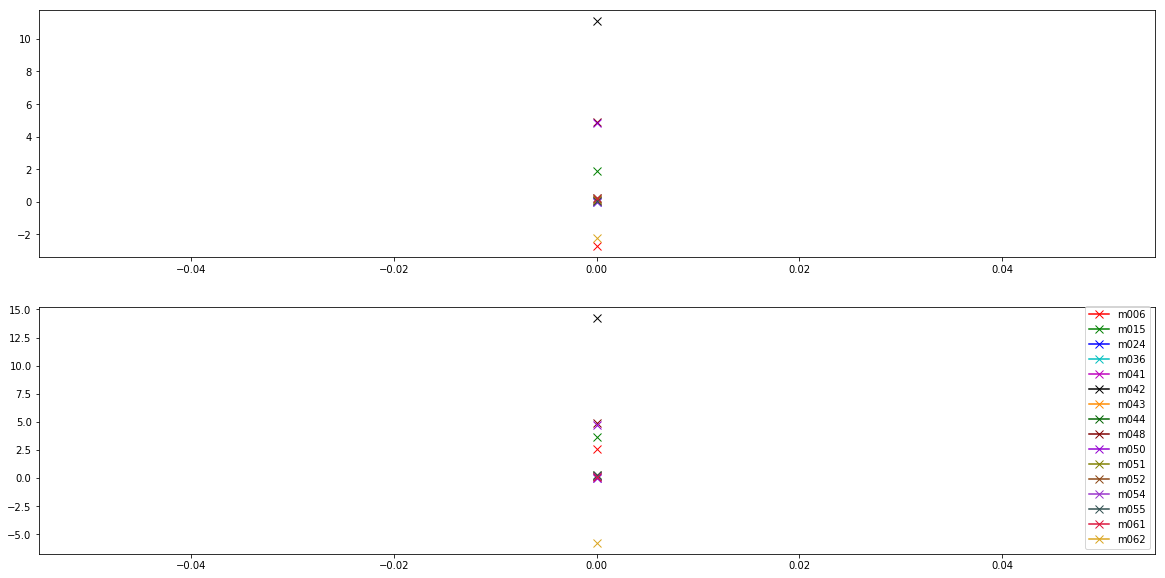

In [52]:
#plot delays (if there are many delays)
fig, ax = plt.subplots(2,1,figsize=(20, 10))
for i in range(len(labels)):
    ax[0].plot(k_0[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[0].set_ylim([-0.2,0.2]);
    ax[1].plot(k_1[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[1].set_ylim([-0.2,0.2]);
plt.legend(loc='lower right')

In [70]:
print labels[5], k_0[0][5],k_1[0][5]
print labels[8], k_0[0][8],k_1[0][8]
print labels[9], k_0[0][9],k_1[0][9]
print labels[15], k_0[0][15],k_1[0][15]

m042 11.0777 14.2457
m048 4.88576 4.8863
m050 4.82035 4.7475
m062 -2.25675 -5.75489


# Gains

In [54]:
g = h.file['TelescopeState']['cal_product_G']
g_list = []
for i, gi in enumerate(g):
    g_list.append(pickle.loads(gi[1]))
g_array = np.array(g_list)
print g_array.shape

g_0 = g_array[:,0,:]
g_1 = g_array[:,1,:]

(1, 2, 16)


In [55]:
#First
print np.abs(g_0)[0]
print np.abs(g_1)[0]

[ 2.2875  2.025   2.6196  1.9479  2.1024  1.7988  2.0723  2.0667  1.8997
  1.9855  2.1034  2.1856  2.4395  2.2379  2.2506  2.0238]
[ 2.3893  2.7475  3.0383  1.8507  1.4422  1.9801  2.1292  2.2977  1.6695
  1.9337  2.2116  2.371   1.9592  1.9965  2.4161  2.1437]


In [56]:
#Last
print np.abs(g_0)[-1]
print np.abs(g_1)[-1]

[ 2.2875  2.025   2.6196  1.9479  2.1024  1.7988  2.0723  2.0667  1.8997
  1.9855  2.1034  2.1856  2.4395  2.2379  2.2506  2.0238]
[ 2.3893  2.7475  3.0383  1.8507  1.4422  1.9801  2.1292  2.2977  1.6695
  1.9337  2.2116  2.371   1.9592  1.9965  2.4161  2.1437]


In [57]:
#Ratio
print np.abs(g_0)[-1]/np.abs(g_0)[0]
print np.abs(g_1)[-1]/np.abs(g_1)[0]

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [58]:
#Before
print np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[0])

[ -26.2403  -39.6532    0.      -49.7507  -92.8273  -12.6931  -73.9951
  -52.9072  -22.9195  -48.271   -76.2353  -30.0279  -12.3625  -24.044
 -110.2418  -94.3582]
[-176.4162 -114.79      0.     -159.8747   13.1158  165.5627  172.527
 -109.7551  -52.2722  -17.6214 -164.0931 -148.6697 -137.073   170.2279
 -122.5821  -73.1301]


In [59]:
#After
print np.rad2deg(np.angle(g_0)[-1])
print np.rad2deg(np.angle(g_1)[-1])

[ -26.2403  -39.6532    0.      -49.7507  -92.8273  -12.6931  -73.9951
  -52.9072  -22.9195  -48.271   -76.2353  -30.0279  -12.3625  -24.044
 -110.2418  -94.3582]
[-176.4162 -114.79      0.     -159.8747   13.1158  165.5627  172.527
 -109.7551  -52.2722  -17.6214 -164.0931 -148.6697 -137.073   170.2279
 -122.5821  -73.1301]


In [60]:
#Differences
print np.rad2deg(np.angle(g_0)[-1])-np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[-1])-np.rad2deg(np.angle(g_1)[0])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


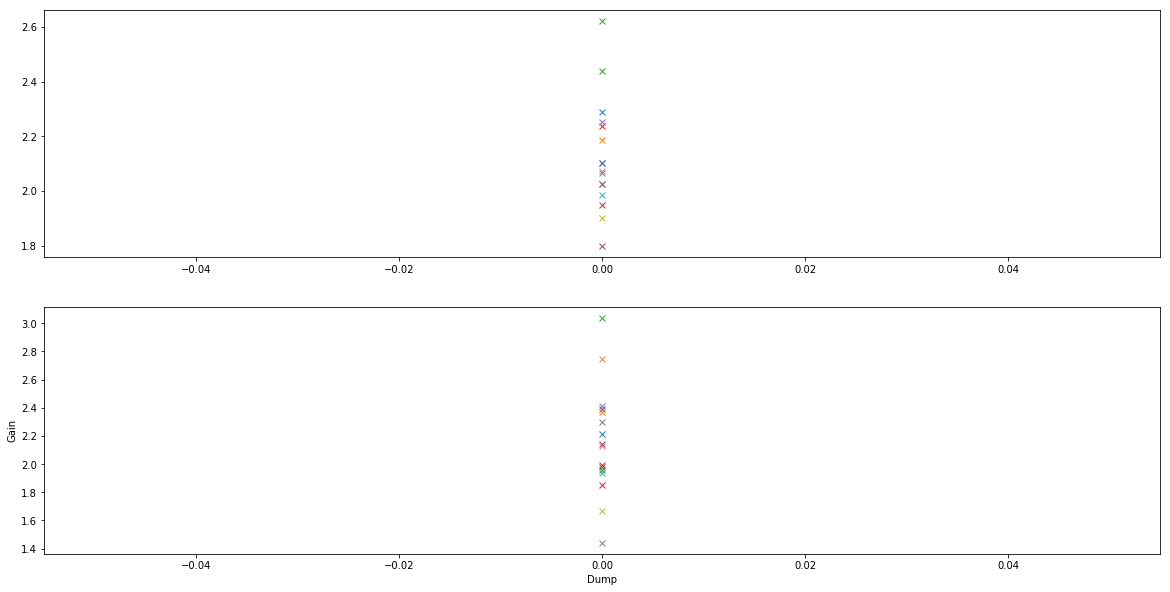

In [61]:
#plot gains - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(g_0),'-x');
#ax[0].set_ylim([0,5.0]);
ax[1].plot(np.abs(g_1),'-x');
#ax[1].set_ylim([0,5.0]);
plt.xlabel('Dump')
plt.ylabel('Gain')
plt.legend()

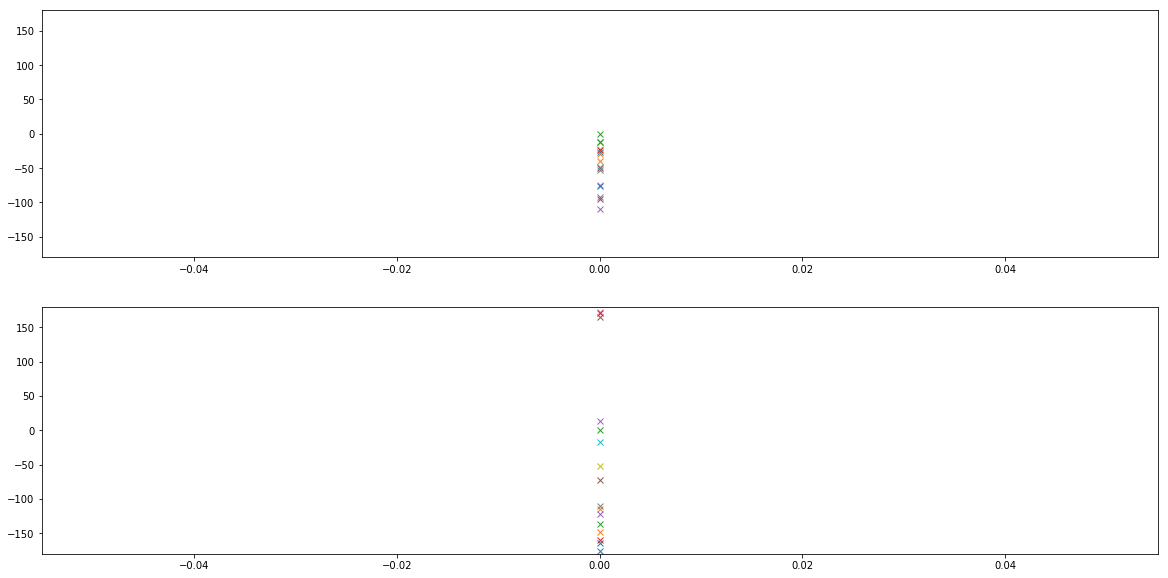

In [62]:
#plot gains - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(g_0)),'-x');
ax[0].set_ylim([-180,180]);
ax[1].plot(np.rad2deg(np.angle(g_1)),'-x');
ax[1].set_ylim([-180,180]);

# Bandpasses    

In [63]:
b = h.file['TelescopeState']['cal_product_B']
b_list = []
for i, bi in enumerate(b):
    b_list.append(pickle.loads(bi[-1]))
b_array = np.array(b_list)
print b_array.shape
# bandpass shape is ntimes x channels x pol x antenna 
# where ntimes is the number of bandpasses

# just look at LAST bandpass for now
b_0_0 = b_array[-1,:,0,:]
b_1_0 = b_array[-1,:,1,:]



(1, 4096, 2, 16)


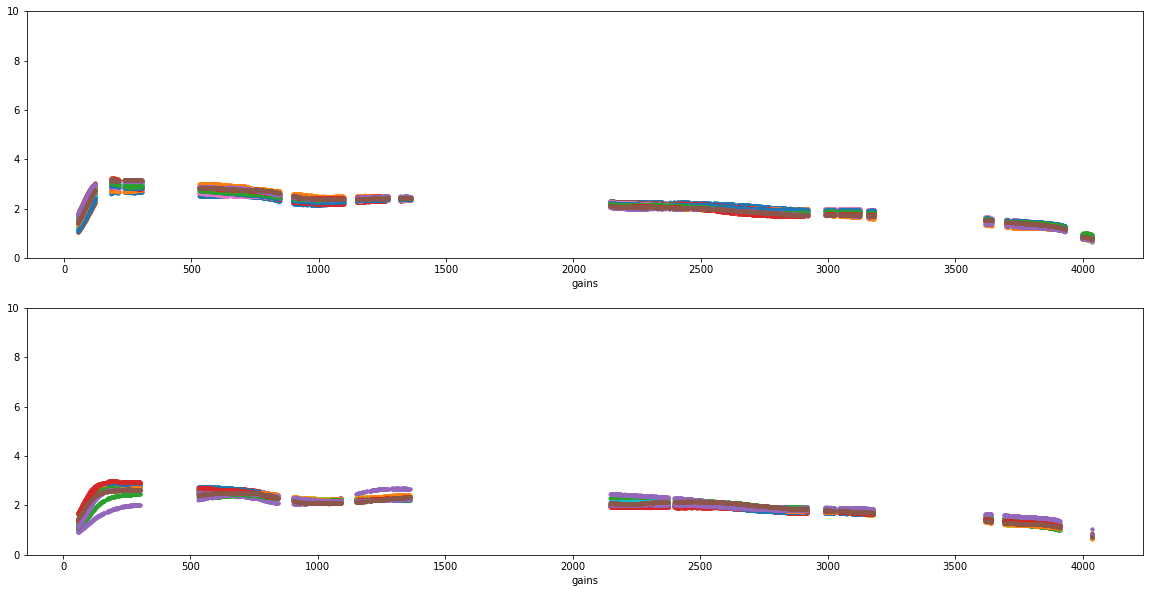

In [64]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_0),'.');
ax[0].set_ylim([0,10]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_0),'.');
ax[1].set_ylim([0,10]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

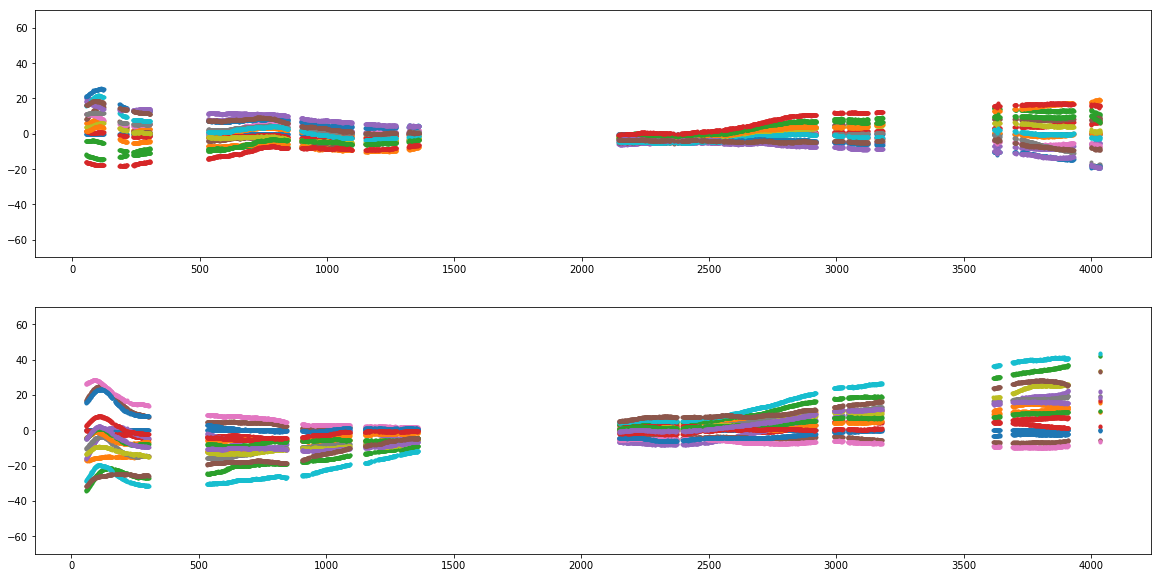

In [65]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(b_0_0)),'.');
ax[0].set_ylim([-70,70]);
ax[1].plot(np.rad2deg(np.angle(b_1_0)),'.');
ax[1].set_ylim([-70,70]);

In [66]:
b_array.shape
# Time,channels,pols,antennas

(1, 4096, 2, 16)

In [67]:
#last bandpass
b_0_1 = b_array[0,:,0,8]
b_1_1 = b_array[0,:,1,8]
b_1_1.shape
print a_array[:,8]

['m048']


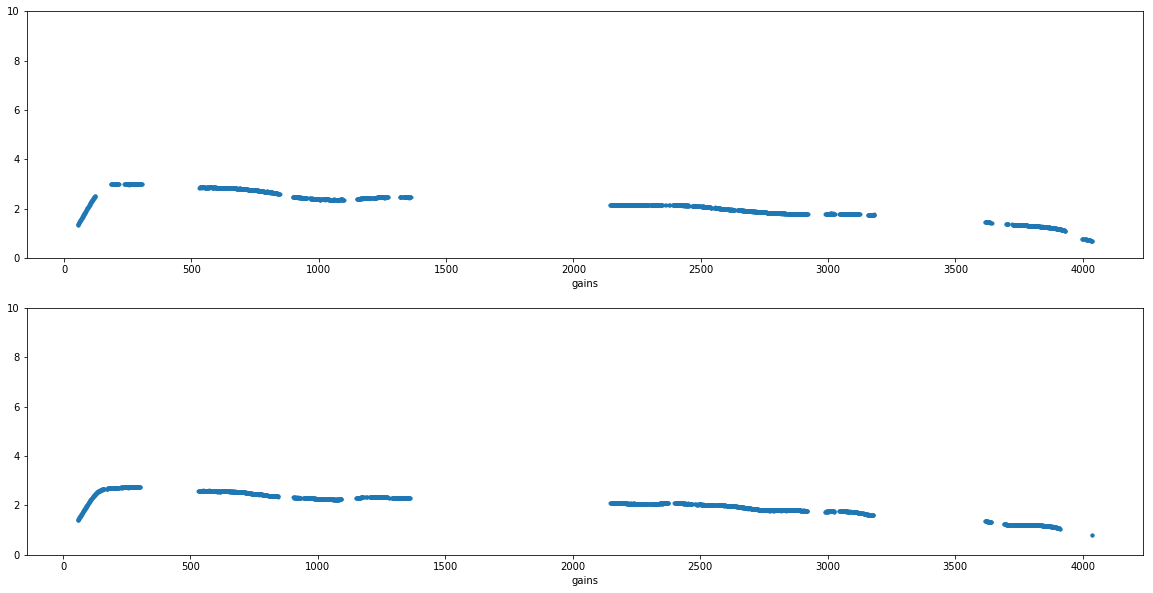

In [68]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_1),'.');
ax[0].set_ylim([0,10]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_1),'.');
ax[1].set_ylim([0,10]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

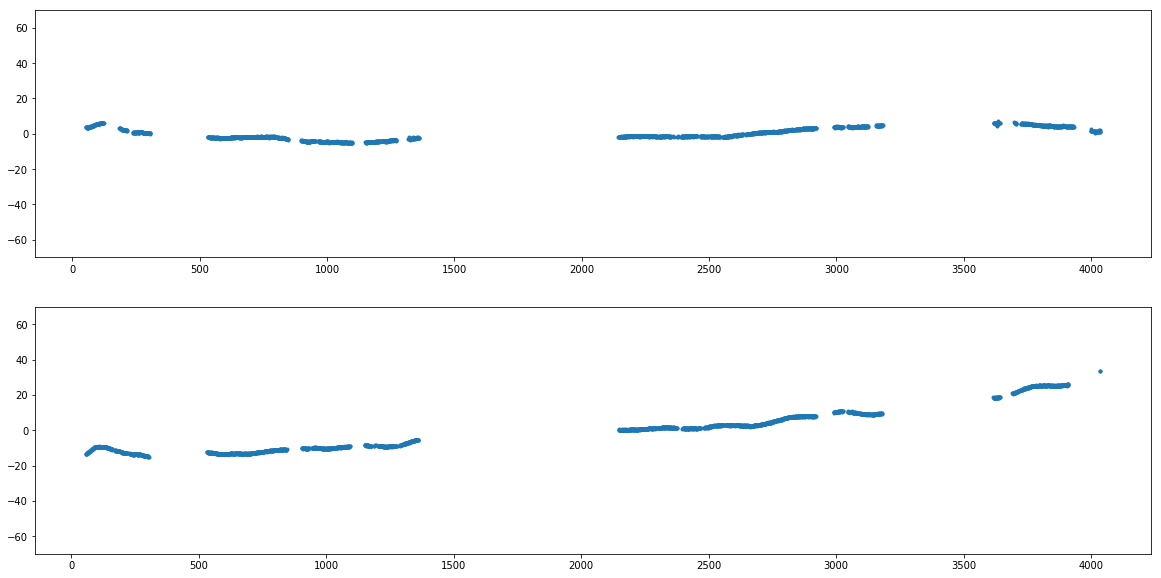

In [69]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(b_0_1)),'.');
ax[0].set_ylim([-70,70]);
ax[1].plot(np.rad2deg(np.angle(b_1_1)),'.');
ax[1].set_ylim([-70,70]);